In [32]:
# import Bio
from Bio import SeqIO
import matplotlib.pyplot as plt
import numpy as np
import time

# GC-content diagram

### What is GC-content?


"In molecular biology and genetics, GC-content (or guanine-cytosine content) is the percentage of nitrogenous bases in a DNA or RNA molecule that are either guanine (G) or cytosine (C). This measure indicates the proportion of G and C bases out of an implied four total bases, also including adenine and thymine in DNA and adenine and uracil in RNA."

~ https://en.wikipedia.org/wiki/GC-content


### What is the aim of this visualization? 

To show how dense is this content near a given point in a genome.

### Paramenters
* window_size
* step_size

# Implementation

In [33]:
def cg_content(seq):
    """
    CG-content of a sequence
    
    Args:
    * seq: Seq - sequence;
    
    Returns:
    * CG-content: float - given by: #{x: x in seq and (x == G or x == C)}/length(seq)
    """
    return seq.count('G') + seq.count('C')

In [34]:
def plot_cg_content(seq, window_size=int(1e6), step_size=int(1e3)):
    """
    CG-content diagram
    
    Args:
    * seq: Seq - sequence;
    * window_size: int - size of a window, 1e6 by default;
    * step_size: int - size of a step, 1e3 by default;
    
    The function plots a CG-content diagram, i.e. percentage of guanine (G) or cytosine (C) inside a window at a given point in the sequence (seq).
    """
    # Plot
    fig = plt.figure(dpi=200)
    plt.plot(
        range(window_size//2, len(seq)-window_size//2, step_size),
        [100*cg_content(seq[i:i+window_size])/window_size for i in range(0, len(seq)-window_size, step_size)]
    )
    plt.title("CG-content")
    plt.legend([f"CG-content: Window Size: {window_size}, Step Size: {step_size}"])
    plt.xlabel("Position in the Sequence")
    plt.ylabel("CG-content")
    plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()]) 

In [35]:
def plot_cg_content_faster(seq, window_size=int(1e6), step_size=int(1e3)):
    """
    CG-content diagram

    Args:
    * seq: Seq - sequence;
    * window_size: int - size of a window, 1e6 by default;
    * step_size: int - size of a step, 1e3 by default;

    The function plots a CG-content diagram, i.e. percentage of guanine (G) or cytosine (C) inside a window at a given point in the sequence (seq).
    """
    # Plot
    fig = plt.figure(dpi=200)
    x = range(window_size//2, len(seq)-window_size//2, step_size)
    y = np.empty([len(x)])
    y[0] = cg_content(seq[0:window_size])
    for i in range(1, len(x)):
        y[i] = y[i-1] - cg_content(seq[(i-1)*step_size:i*step_size]) + cg_content(seq[(i-1)*step_size + window_size:i*step_size + window_size])
    plt.plot(x, 100*y/window_size)
    plt.title("CG-content")
    plt.legend([f"CG-content: Window Size: {window_size}, Step Size: {step_size}"])
    plt.xlabel("Position in the Sequence")
    plt.ylabel("CG-content")
    plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])

# Test

### Parsing

In [36]:
parsed = list(SeqIO.parse('../../data/fasta_test.fa', 'fasta'))[0]

### Sequence Data

In [37]:
parsed.seq

Seq('AGCTTTTCATTCTGACTGCAACGGGCAATATGTCTCTGTGTGGATTAAAAAAAG...TTC')

In [38]:
parsed.id

'Chromosome'

In [39]:
parsed.name

'Chromosome'

In [40]:
parsed.description

'Chromosome dna:chromosome chromosome:ASM584v2:Chromosome:1:4641652:1 REF'

In [41]:
parsed.dbxrefs

[]

### Visualization

<ipython-input-34-5dbca1c30735>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])


Time of slower implementation 30.358318328857422


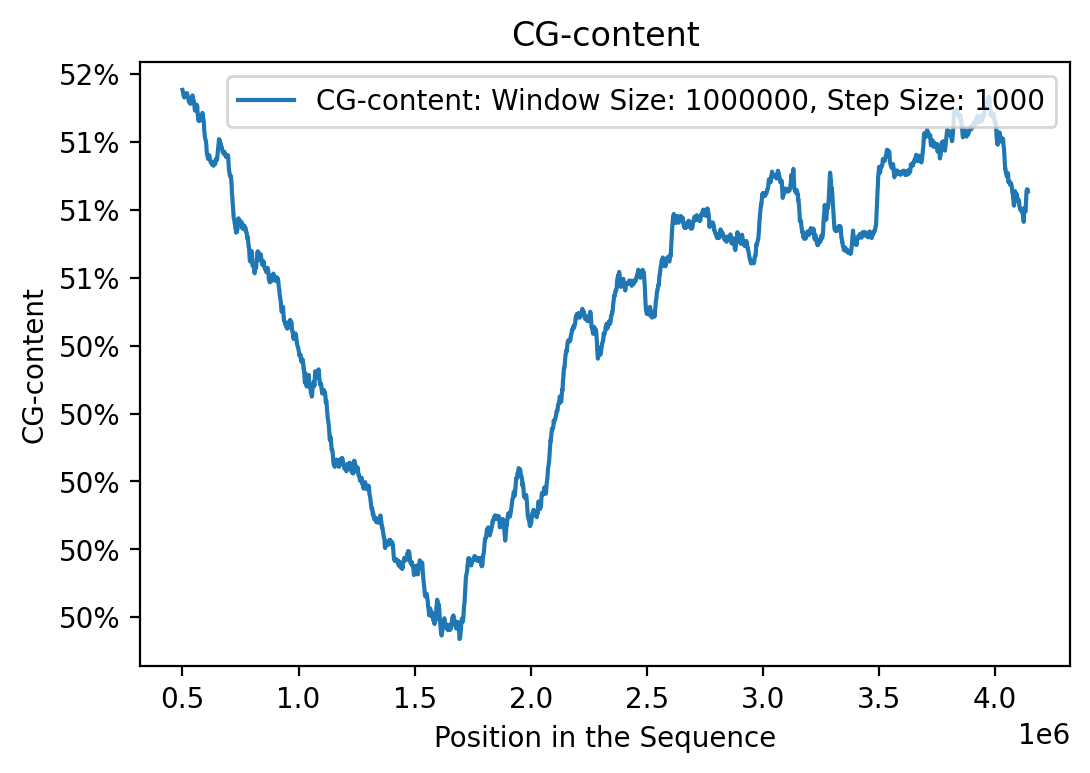

In [44]:
start = time.time()

plot_cg_content(parsed.seq, window_size=int(1e6), step_size=int(1e3))

print(f'Time of slower implementation {time.time() - start}')

<ipython-input-35-a1493abe2fcc>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])


Time of faster implementation 0.12346458435058594


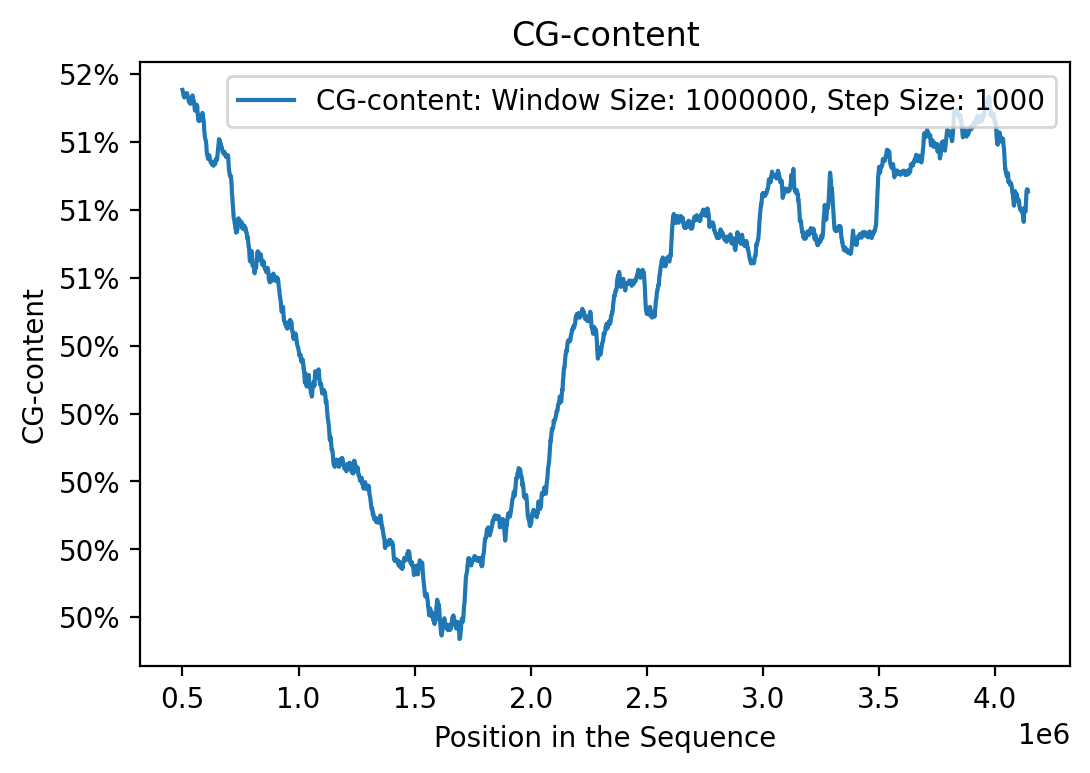

In [45]:
start = time.time()

plot_cg_content_faster(parsed.seq, window_size=int(1e6), step_size=int(1e3))

print(f'Time of faster implementation {time.time() - start}')